In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.model_selection import train_test_split

C:\Users\yasme\OneDrive\Desktop\yasmin\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r'C:\Users\yasme\Downloads\data.csv')

# 1- Data Exploration

In [3]:
df.shape

(2938, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2938 non-null   int64  
 1   Nation                            2937 non-null   object 
 2   Survey_Year                       2936 non-null   float64
 3   Country_Category                  2935 non-null   object 
 4   Mortality_Adults                  2925 non-null   float64
 5   Infant_Deaths_Count               2938 non-null   int64  
 6   Alcohol_Consumption_Rate          2744 non-null   float64
 7   Expenditure_Percentage_GDP        2938 non-null   float64
 8   Hepatitis_B_Vaccination_Coverage  2385 non-null   float64
 9   Measles_Infection_Count           2936 non-null   float64
 10  Body_Mass_Index_Avg               2904 non-null   float64
 11  Polio_Vaccination_Coverage        2919 non-null   float64
 12  Total_

In [5]:
df.head(10)

,Unnamed: 0,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
0,0,Syrian Arab Republic,2006.0,Developing,123.0,8,0.97,122.652333,83.0,517.0,48.5,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,73.7
1,1,Croatia,2006.0,Developed,113.0,0,11.83,1555.651986,NaN,1.0,58.1,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,75.9
2,2,Montenegro,2007.0,Developing,125.0,0,4.98,678.518894,9.0,0.0,57.2,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,74.2
3,3,Bahrain,2014.0,Developing,7.0,0,1.57,367.255674,98.0,46.0,62.9,98.0,4.98,98.0,0.1,24983.379200,NaN,6.1,76.8
4,4,Kenya,2000.0,Developing,428.0,77,1.51,0.681686,NaN,21002.0,14.4,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,51.9
5,5,Chad,2008.0,Developing,394.0,46,0.45,49.091982,17.0,63.0,16.4,3.0,2.92,19.0,4.7,929.772391,11133861.0,9.8,49.6
6,6,Solomon Islands,2005.0,Developing,24.0,0,0.90,25.311560,83.0,0.0,42.1,9.0,7.83,89.0,0.1,88.874858,469885.0,1.3,67.4
7,7,Peru,2008.0,Developing,138.0,11,4.85,58.498974,93.0,1.0,5.8,93.0,4.73,93.0,0.3,428.878110,2864198.0,1.2,73.9
8,8,Bosnia and Herzegovina,2014.0,Developing,89.0,0,4.03,732.866249,89.0,3000.0,55.3,86.0,9.57,86.0,0.1,5193.949320,35662.0,2.4,77.2
9,9,Swaziland,2011.0,NaN,438.0,2,5.20,735.709098,91.0,0.0,3.2,85.0,8.61,91.0,15.7,3934.273250,1225258.0,5.1,55.0


In [6]:
df.isnull().sum()

Unnamed: 0                            0
Nation                                1
Survey_Year                           2
Country_Category                      3
Mortality_Adults                     13
Infant_Deaths_Count                   0
Alcohol_Consumption_Rate            194
Expenditure_Percentage_GDP            0
Hepatitis_B_Vaccination_Coverage    553
Measles_Infection_Count               2
Body_Mass_Index_Avg                  34
Polio_Vaccination_Coverage           19
Total_Health_Expenditure            227
Diphtheria_Vaccination_Coverage      19
HIV_AIDS_Prevalence_Rate              0
Gross_Domestic_Product              448
Total_Population                    652
Thinness                             34
Life_Expectancy_Years                10
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,Survey_Year,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
count,2938.000000,2936.00000,2925.000000,2938.000000,2744.000000,2938.000000,2385.000000,2936.000000,2904.000000,2919.000000,2711.000000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2928.000000
mean,1468.500000,2007.52282,164.865299,30.303948,4.602861,738.251295,80.940461,2420.752384,38.321247,82.550188,5.938359,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,69.224932
std,848.271871,4.61257,124.316868,117.926501,4.052413,1987.914858,25.070016,11471.077443,20.044034,23.428046,2.498765,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,9.523867
min,0.000000,2000.00000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,36.300000
25%,734.250000,2004.00000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,78.000000,4.260000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,63.100000
50%,1468.500000,2008.00000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,93.000000,5.760000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,72.100000
75%,2202.750000,2012.00000,228.000000,22.000000,7.702500,441.534144,97.000000,358.750000,56.200000,97.000000,7.495000,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,75.700000
max,2937.000000,2015.00000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,89.000000


# 2- Data Cleaning

In [8]:
# The goal of the machine model i will build is to classify countries into specific categories (developed  or  developing)
# The removed columns have a high percentage of missing values or are irrelevant to the classification objective

### Nation column

In [9]:
df.drop(['Unnamed: 0', 'Survey_Year', 'Mortality_Adults', 'Body_Mass_Index_Avg', 'Alcohol_Consumption_Rate', 
         'Diphtheria_Vaccination_Coverage'], 
        axis=1, inplace=True)

In [10]:
df.isnull().sum()

Nation                                1
Country_Category                      3
Infant_Deaths_Count                   0
Expenditure_Percentage_GDP            0
Hepatitis_B_Vaccination_Coverage    553
Measles_Infection_Count               2
Polio_Vaccination_Coverage           19
Total_Health_Expenditure            227
HIV_AIDS_Prevalence_Rate              0
Gross_Domestic_Product              448
Total_Population                    652
Thinness                             34
Life_Expectancy_Years                10
dtype: int64

### Country_Category

In [11]:
df['Country_Category'].unique()

array(['Developing', 'Developed', nan], dtype=object)

In [12]:
df['Country_Category'].isnull().sum()

3

In [13]:
df.dropna(subset=['Country_Category'], inplace=True)

In [14]:
df['Country_Category'].isnull().sum()

0

In [15]:
df['Country_Category'] = df['Country_Category'].replace({'Developing': 0, 'Developed': 1})

In [16]:
df['Country_Category'].unique()

array([0, 1], dtype=int64)

### Infant_Deaths_Count

In [17]:
df['Infant_Deaths_Count'] = df['Infant_Deaths_Count'].replace(0, df['Infant_Deaths_Count'].median())

### Expenditure_Percentage_GDP

In [18]:
df['Expenditure_Percentage_GDP'] = df['Expenditure_Percentage_GDP'].round().astype(int)

In [19]:
df['Expenditure_Percentage_GDP'] = df['Expenditure_Percentage_GDP'].replace(0, df['Expenditure_Percentage_GDP'].median())

### Hepatitis_B_Vaccination_Coverage

In [20]:
df['Hepatitis_B_Vaccination_Coverage'].unique()

array([83., nan,  9., 98., 17., 93., 89., 63., 99., 88., 68., 95., 81.,
       94., 82., 86., 49., 36., 25., 78., 96., 84., 92., 91., 76., 47.,
       75.,  8., 73.,  2., 52., 64., 97., 14., 11., 77., 45., 37., 71.,
       72., 85., 67., 55., 44.,  5., 74., 41.,  6., 35., 87.,  7., 56.,
       62., 29., 66., 69., 16., 53., 79., 51.,  4., 42., 58., 61., 57.,
       46., 39., 33., 31., 65., 28., 43., 48., 27., 21., 26., 59., 23.,
       18., 24., 22., 54., 15., 32.,  1., 38., 12., 19.])

In [21]:
df['Hepatitis_B_Vaccination_Coverage'] = df['Hepatitis_B_Vaccination_Coverage'].fillna(df['Hepatitis_B_Vaccination_Coverage'].mean())

In [22]:
df['Hepatitis_B_Vaccination_Coverage'] = df['Hepatitis_B_Vaccination_Coverage'].round().astype(int)

In [23]:
df['Hepatitis_B_Vaccination_Coverage'].head(10)

0     83
1     81
2      9
3     98
4     81
5     17
6     83
7     93
8     89
10    81
Name: Hepatitis_B_Vaccination_Coverage, dtype: int32

### Measles_Infection_Count 

In [24]:
df.dropna(subset=['Measles_Infection_Count'], inplace=True)

In [25]:
df['Measles_Infection_Count'] = df['Measles_Infection_Count'].replace(0.0, df['Measles_Infection_Count'].median())

In [26]:
df['Measles_Infection_Count'] = df['Measles_Infection_Count'].round().astype(int)

### Polio_Vaccination_Coverage 

In [27]:
df['Polio_Vaccination_Coverage'].unique()

array([83., 96., 92., 98.,  8.,  3.,  9., 93., 86., 57., 81., 63., 99.,
       65., 58., 71., 91., 95., 79., 94., 66., 88., 87., 72., 82., 84.,
       47., 89.,  4.,  7., 55., 51., 97., 52., 77., 75., 59., 73., 76.,
       85., 62., 56., 46., 69., 78., nan, 44., 74., 49., 61., 67., 43.,
        6., 17., 41., 38., 42.,  5., 68., 48., 39., 64., 45., 26., 54.,
       36., 37., 35., 23., 53., 32., 24., 31., 33.])

In [28]:
df['Polio_Vaccination_Coverage'].isnull().sum()

19

In [29]:
df['Polio_Vaccination_Coverage'] = df['Polio_Vaccination_Coverage'].fillna(df['Polio_Vaccination_Coverage'].median())

In [30]:
df['Polio_Vaccination_Coverage'] = df['Polio_Vaccination_Coverage'].astype(int)

In [31]:
df['Polio_Vaccination_Coverage'].unique()

array([83, 96, 92, 98,  8,  3,  9, 93, 86, 57, 81, 63, 99, 65, 58, 71, 91,
       95, 79, 94, 66, 88, 87, 72, 82, 84, 47, 89,  4,  7, 55, 51, 97, 52,
       77, 75, 59, 73, 76, 85, 62, 56, 46, 69, 78, 44, 74, 49, 61, 67, 43,
        6, 17, 41, 38, 42,  5, 68, 48, 39, 64, 45, 26, 54, 36, 37, 35, 23,
       53, 32, 24, 31, 33])

### Total_Health_Expenditure            

In [32]:
df['Total_Health_Expenditure'].head(20)

0     3.78
1     6.95
2     6.74
3     4.98
4     4.68
5     2.92
6     7.83
7     4.73
8     9.57
10    4.48
11     NaN
12    4.73
13    7.37
14    6.32
15    6.68
16    5.80
17    1.37
18    5.90
19    8.65
20    8.52
Name: Total_Health_Expenditure, dtype: float64

In [33]:
df['Total_Health_Expenditure'] = df['Total_Health_Expenditure'].fillna(df['Total_Health_Expenditure'].median())

In [34]:
df['Total_Health_Expenditure'].isnull().sum()

0

### Gross_Domestic_Product

In [35]:
df['Gross_Domestic_Product'].unique()

array([ 1762.24617  , 11363.41845  ,  5957.145693 , ...,   615.8198192,
       27387.2258   ,   276.75896  ])

In [36]:
df['Gross_Domestic_Product'].fillna(df['Gross_Domestic_Product'].median(), inplace=True)

In [37]:
df['Gross_Domestic_Product'] = df['Gross_Domestic_Product'].round().astype(int)

### Total_Population

In [38]:
df['Total_Population'].unique()

array([1.8914977e+07, 4.4400000e+02, 6.1587500e+05, ..., 9.5568890e+06,
       5.7313230e+06, 3.9697000e+04])

In [39]:
df['Total_Population'].describe()

count    2.281000e+03
mean     1.276437e+07
std      6.107489e+07
min      3.400000e+01
25%      1.955530e+05
50%      1.395398e+06
75%      7.423289e+06
max      1.293859e+09
Name: Total_Population, dtype: float64

In [40]:
df['Total_Population'].fillna(df['Total_Population'].median(), inplace=True)

In [41]:
df['Total_Population'] = df['Total_Population'].apply(lambda x: '{:,.0f}'.format(x))

In [42]:
df['Total_Population'].unique()

array(['18,914,977', '444', '615,875', ..., '9,556,889', '5,731,323',
       '39,697'], dtype=object)

In [43]:
df['Total_Population'] = df['Total_Population'].replace({',': ''}, regex=True).astype(int)

### Thinness    -    Life_Expectancy_Years

In [44]:
df = df.dropna(subset=['Thinness', 'Life_Expectancy_Years'])

In [45]:
df['Thinness'] = df['Thinness'].round().astype(int)
df['Life_Expectancy_Years'] = df['Life_Expectancy_Years'].round().astype(int)

In [46]:
df.isnull().sum()

Nation                              1
Country_Category                    0
Infant_Deaths_Count                 0
Expenditure_Percentage_GDP          0
Hepatitis_B_Vaccination_Coverage    0
Measles_Infection_Count             0
Polio_Vaccination_Coverage          0
Total_Health_Expenditure            0
HIV_AIDS_Prevalence_Rate            0
Gross_Domestic_Product              0
Total_Population                    0
Thinness                            0
Life_Expectancy_Years               0
dtype: int64

In [47]:
df.shape

(2891, 13)

In [48]:
df.head(20)

,Nation,Country_Category,Infant_Deaths_Count,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Polio_Vaccination_Coverage,Total_Health_Expenditure,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
0,Syrian Arab Republic,0,8,123,83,517,83,3.780,0.1,1762,18914977,6,74
1,Croatia,1,3,1556,81,1,96,6.950,0.1,11363,444,2,76
2,Montenegro,0,3,679,9,17,92,6.740,0.1,5957,615875,2,74
3,Bahrain,0,3,367,98,46,98,4.980,0.1,24983,1395398,6,77
4,Kenya,0,77,1,81,21002,8,4.680,18.1,44,3145483,9,52
5,Chad,0,46,49,17,63,3,2.920,4.7,930,11133861,10,50
6,Solomon Islands,0,3,25,83,17,9,7.830,0.1,89,469885,1,67
7,Peru,0,11,58,93,1,93,4.730,0.3,429,2864198,1,74
8,Bosnia and Herzegovina,0,3,733,89,3000,86,9.570,0.1,5194,35662,2,77
10,Cameroon,0,62,5,81,14629,57,4.480,7.7,68,15274234,8,51


# 3- visualization

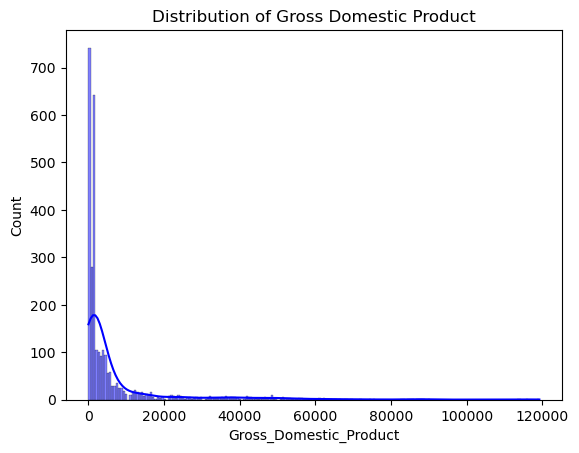

In [49]:
sns.histplot(df['Gross_Domestic_Product'], kde=True, color='blue')
plt.title('Distribution of Gross Domestic Product')
plt.show()

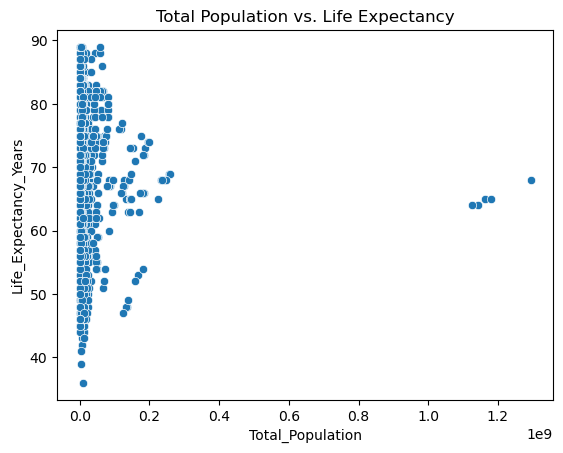

In [50]:
sns.scatterplot(x='Total_Population', y='Life_Expectancy_Years', data=df)
plt.title('Total Population vs. Life Expectancy')
plt.show()

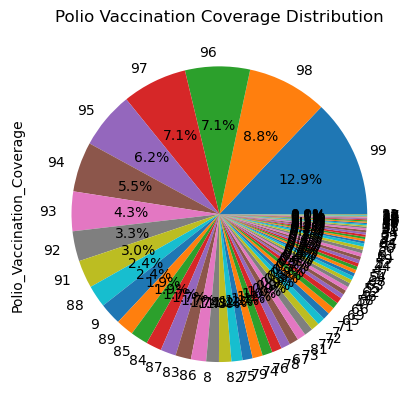

In [51]:
df['Polio_Vaccination_Coverage'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Polio Vaccination Coverage Distribution')
plt.show()

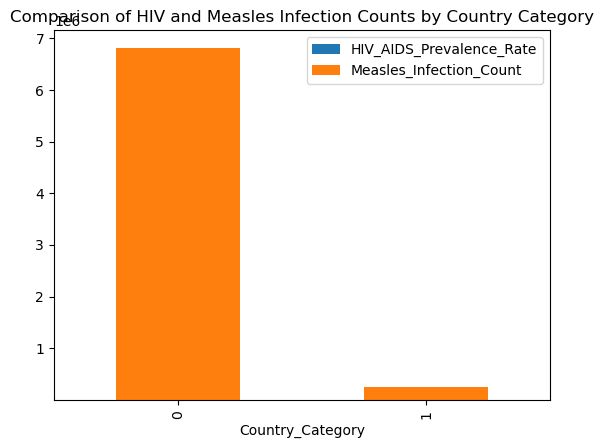

In [52]:
df.groupby('Country_Category')[['HIV_AIDS_Prevalence_Rate', 'Measles_Infection_Count']].sum().plot(kind='bar', stacked=True)
plt.title('Comparison of HIV and Measles Infection Counts by Country Category')
plt.show()

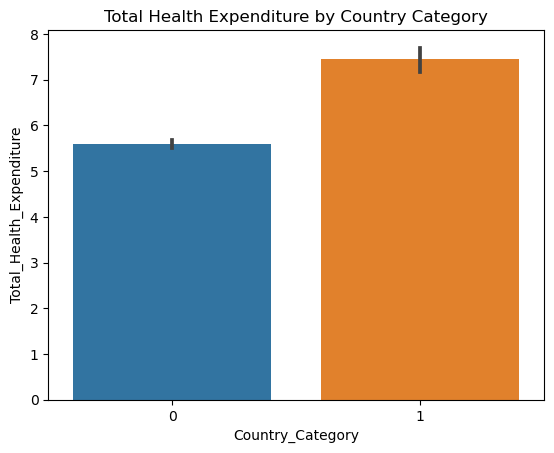

In [53]:
sns.barplot(x='Country_Category', y='Total_Health_Expenditure', data=df)
plt.title('Total Health Expenditure by Country Category')
plt.show()

# 4- Machine Learning Model
##### I am not very good in building machine learning models yet, but I will give it a try

In [54]:
df.isnull().sum()

Nation                              1
Country_Category                    0
Infant_Deaths_Count                 0
Expenditure_Percentage_GDP          0
Hepatitis_B_Vaccination_Coverage    0
Measles_Infection_Count             0
Polio_Vaccination_Coverage          0
Total_Health_Expenditure            0
HIV_AIDS_Prevalence_Rate            0
Gross_Domestic_Product              0
Total_Population                    0
Thinness                            0
Life_Expectancy_Years               0
dtype: int64

In [55]:
Nations = df['Nation']

In [56]:
df.drop(['Nation'], axis=1, inplace=True)
# I temporarily will remove the 'nation' column to simplify the analysis  
# I plan to add it back to the dataset after the model has been trained

In [57]:
X = df[[ 'Infant_Deaths_Count',
       'Expenditure_Percentage_GDP', 'Hepatitis_B_Vaccination_Coverage',
       'Measles_Infection_Count', 'Polio_Vaccination_Coverage',
       'Total_Health_Expenditure', 'HIV_AIDS_Prevalence_Rate',
       'Gross_Domestic_Product', 'Total_Population', 'Thinness',
       'Life_Expectancy_Years']]

y = df['Country_Category']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [60]:
df.dtypes

Country_Category                      int64
Infant_Deaths_Count                   int64
Expenditure_Percentage_GDP            int32
Hepatitis_B_Vaccination_Coverage      int32
Measles_Infection_Count               int32
Polio_Vaccination_Coverage            int32
Total_Health_Expenditure            float64
HIV_AIDS_Prevalence_Rate            float64
Gross_Domestic_Product                int32
Total_Population                      int32
Thinness                              int32
Life_Expectancy_Years                 int32
dtype: object

In [61]:
df['Country_Category'].dtypes

dtype('int64')

In [62]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)

In [63]:
accuracy

0.9447322970639033

In [64]:
Nations.shape

(2891,)

In [65]:
df.shape

(2891, 12)

In [68]:
df = pd.concat([Nations , df], axis=1)

In [69]:
df.head()

,Nation,Country_Category,Infant_Deaths_Count,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Polio_Vaccination_Coverage,Total_Health_Expenditure,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years,Nation
0,Syrian Arab Republic,0,8,123,83,517,83,3.78,0.1,1762,18914977,6,74,Syrian Arab Republic
1,Croatia,1,3,1556,81,1,96,6.95,0.1,11363,444,2,76,Croatia
2,Montenegro,0,3,679,9,17,92,6.74,0.1,5957,615875,2,74,Montenegro
3,Bahrain,0,3,367,98,46,98,4.98,0.1,24983,1395398,6,77,Bahrain
4,Kenya,0,77,1,81,21002,8,4.68,18.1,44,3145483,9,52,Kenya
